https://www.kaggle.com/datasets/rounakpaul/car-crash

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Counting content of Dataset

In [2]:
L = 0
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/CarCrashesDataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
    L = L + len(filenames)

There are 2 directories and 0 images in '../input/car-crash/crashedCars'
There are 0 directories and 1273 images in '../input/car-crash/crashedCars/after'
There are 0 directories and 731 images in '../input/car-crash/crashedCars/before'


## Example Image from Dataset    : /content/drive/MyDrive/

Image example shape: (720, 1280, 3)


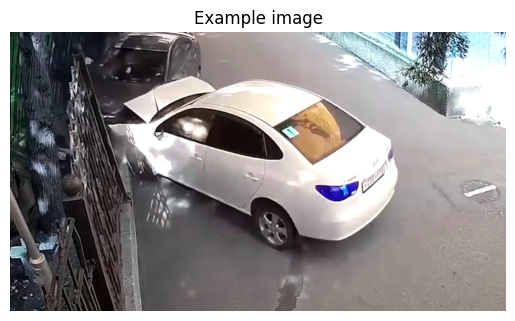

In [3]:
EXAMPLE_IMG_PATH = r"/content/drive/MyDrive/CarCrashesDataset/crashedCars/after/frame1_42.jpg"
img1 = cv2.imread(EXAMPLE_IMG_PATH)
print(f"Image example shape: {img1.shape}")
plt.imshow(img1)
plt.title("Example image")
plt.axis("off")
plt.show()

## Basic Image Processing

In [4]:
# Grayscale
def rgb2gray(rgb_img):
    output_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
    return output_img

In [5]:
# Scale to 0 to 1
def scale(image):
    return image / 255

In [6]:
#resize
def resize_img(image, rows=224, cols=224):
    return cv2.resize(image, dsize=(rows, cols), interpolation=cv2.INTER_CUBIC)

In [7]:
# resize the shape
def reshape(image, axis):
    return np.expand_dims(image.mean(axis=axis), axis=1)

In [8]:
# Function to call other Preprocessing Functions
def preprocessed_img(input_img):
    output_img = rgb2gray(input_img)
    output_img = scale(output_img)
    output_img = resize_img(output_img)
    output_img = reshape(output_img, 1)
    return output_img

In [9]:
# Image converted in array
preprocessed_img(img1)

array([[0.56492614],
       [0.58172631],
       [0.59130275],
       [0.55984498],
       [0.56050657],
       [0.54854124],
       [0.55848896],
       [0.53684421],
       [0.53365138],
       [0.52749426],
       [0.53226898],
       [0.52538453],
       [0.52013048],
       [0.5193384 ],
       [0.5213679 ],
       [0.51278317],
       [0.50907247],
       [0.51601097],
       [0.51817876],
       [0.52270091],
       [0.52437251],
       [0.5432773 ],
       [0.54808585],
       [0.54495227],
       [0.54221376],
       [0.5290548 ],
       [0.52079953],
       [0.52494072],
       [0.53090983],
       [0.52212573],
       [0.53267749],
       [0.52183643],
       [0.50637816],
       [0.51131805],
       [0.52123901],
       [0.51908558],
       [0.53681745],
       [0.54154133],
       [0.54596046],
       [0.56065352],
       [0.57456527],
       [0.60077392],
       [0.60854862],
       [0.61773593],
       [0.63574591],
       [0.6421859 ],
       [0.65195631],
       [0.650

## Creating matrices to store converted images and assigning class lebels

In [10]:
# matrix containing L vectors of shape (224, 1)
mean_vector_matrix = np.zeros(shape=(L, 224, 1))
# Target vector containing the classes for L images
target_vector = np.zeros(shape=(L, 1))

In [11]:
n = 0
for root, dirnames, filenames in os.walk(r"../input/car-crash/crashedCars/after"):
    n_total = len(filenames)
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = cv2.imread(file_path)
        img = preprocessed_img(img)
        mean_vector_matrix[n] = img
        target_vector[n] = 1
        if n % 40 == 0:
            print(f"File {n} {filename}")
        n = n + 1  

File 0 frame7_165.jpg
File 40 frame1_68.jpg
File 80 frame2_156.jpg
File 120 frame8_167.jpg
File 160 frame5_209.jpg
File 200 frame1_92.jpg
File 240 frame5_157.jpg
File 280 frame8_277.jpg
File 320 frame8_538.jpg
File 360 frame5_162.jpg
File 400 frame5_137.jpg
File 440 frame6_169.jpg
File 480 frame2_151.jpg
File 520 frame8_448.jpg
File 560 frame8_302.jpg
File 600 frame8_648.jpg
File 640 frame8_105.jpg
File 680 frame8_192.jpg
File 720 frame2_137.jpg
File 760 frame8_254.jpg
File 800 frame5_149.jpg
File 840 frame8_517.jpg
File 880 frame8_530.jpg
File 920 frame1_31.jpg
File 960 frame6_149.jpg
File 1000 frame8_111.jpg
File 1040 frame8_598.jpg
File 1080 frame8_221.jpg
File 1120 frame1_103.jpg
File 1160 frame8_643.jpg
File 1200 frame5_325.jpg
File 1240 frame8_349.jpg


In [12]:
for root, dirnames, filenames in os.walk(r"../input/car-crash/crashedCars/before"):
    n_total = len(filenames)
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = cv2.imread(file_path)
        img = preprocessed_img(img)
        mean_vector_matrix[n] = img
        target_vector[n] = 0
        if n % 40 == 0:
            print(f"File {n} {filename}")
        n = n + 1  

File 1280 frame2_98.jpg
File 1320 frame8_11.jpg
File 1360 frame2_69.jpg
File 1400 frame3_141.jpg
File 1440 frame4_96.jpg
File 1480 frame8_37.jpg
File 1520 frame3_92.jpg
File 1560 frame2_96.jpg
File 1600 frame3_9.jpg
File 1640 frame6_72.jpg
File 1680 frame3_142.jpg
File 1720 frame5_19.jpg
File 1760 frame5_1.jpg
File 1800 frame3_100.jpg
File 1840 frame4_5.jpg
File 1880 frame6_46.jpg
File 1920 frame5_10.jpg
File 1960 frame3_146.jpg
File 2000 frame7_30.jpg


In [13]:

SEED = 0
x_train, x_test, y_train, y_test = train_test_split(mean_vector_matrix, target_vector, test_size=0.2, random_state=SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)
input_shape = x_train.shape
input_shape


(1603, 224, 1)

## ANN Model creation

In [14]:
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=200, activation='relu', input_shape = input_shape),
   tf.keras.layers.Dense(units=200, activation='relu', input_shape = input_shape),
   tf.keras.layers.Dense(units=2, activation='softmax')
])

In [15]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer = 'sgd',
  metrics = ['accuracy']
)

In [16]:
#try training more times for better results
history = model.fit(
  x = x_train,
  y = y_train,
  epochs = 20
)

Epoch 1/20
51/51 [==============================] - 1s 3ms/step - loss: 0.6305 - accuracy: 0.6363
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.6706
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5834 - accuracy: 0.6762
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7087
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7405
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.7492
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7642
Epoch 8/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7760
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7867
Epoch 10/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7898
Epoch 11/20
51/51 [

## Extra

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense (Dense)               (None, 200)               45000     
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 85602 (334.38 KB)
Trainable params: 85602 (334.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


13/13 - 0s - loss: 0.4840 - accuracy: 0.7731 - 219ms/epoch - 17ms/step


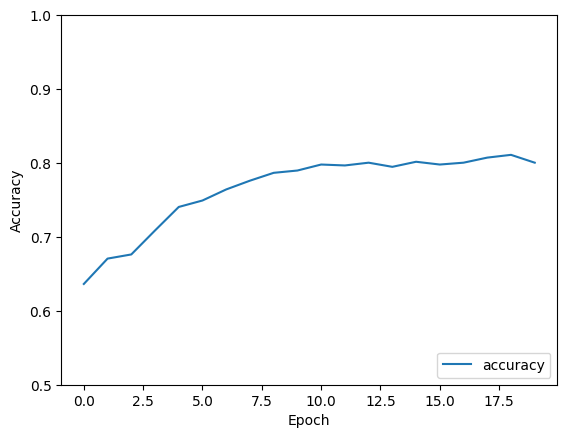

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
def run_example(img_path):
  img=preprocessed_img(img_path)
  model=load_model('model.weight.best.hdf5')
  result=model.predict(img)
  class_y=np.argmax(result,axis=1)
  cifar10_labels=['Airplane','Automombile','Bird','Cat','Deer','Dog','Frog','horse','ship','trucks']
  print(cifar10_labels[int(class_y)])


In [ ]:
run_example('car.jpg')